# NetworkX Package in Python

### 1. An Intro to NetworkX

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

### 2. Creating Graphs

#### 2.1 Creating Graphs using Built-in Generators

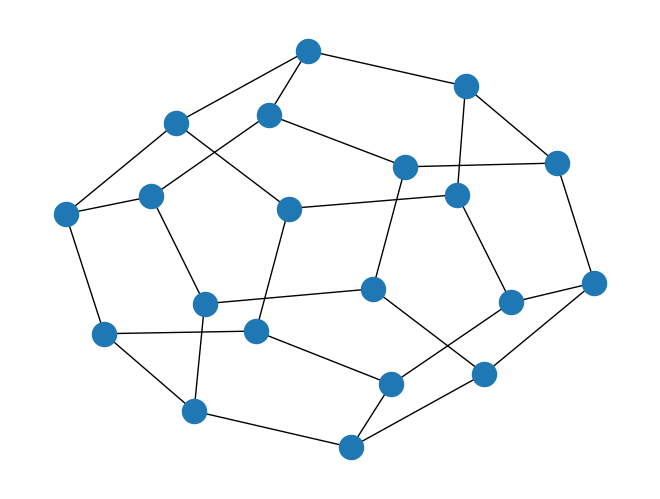

In [4]:
# Dodecahedron graph
G20 = nx.dodecahedral_graph()
nx.draw(G20)